# Plant Diseases

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

---

## Corn

### Load Data

In [2]:
train_dir = 'Corn/train'
test_dir = 'Corn/test'

In [3]:
train_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical', subset='training')
valid_data = train_gen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='categorical', subset='validation')

Found 5855 images belonging to 4 classes.
Found 1461 images belonging to 4 classes.


In [4]:
train_data.class_indices

{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_(maize)___Common_rust_': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3}

In [5]:
class_name = ['Gray Leaf Spot', 'Common Rust', 'Northern Leaf Blight', 'Healthy']

### Explorative Data Analysis

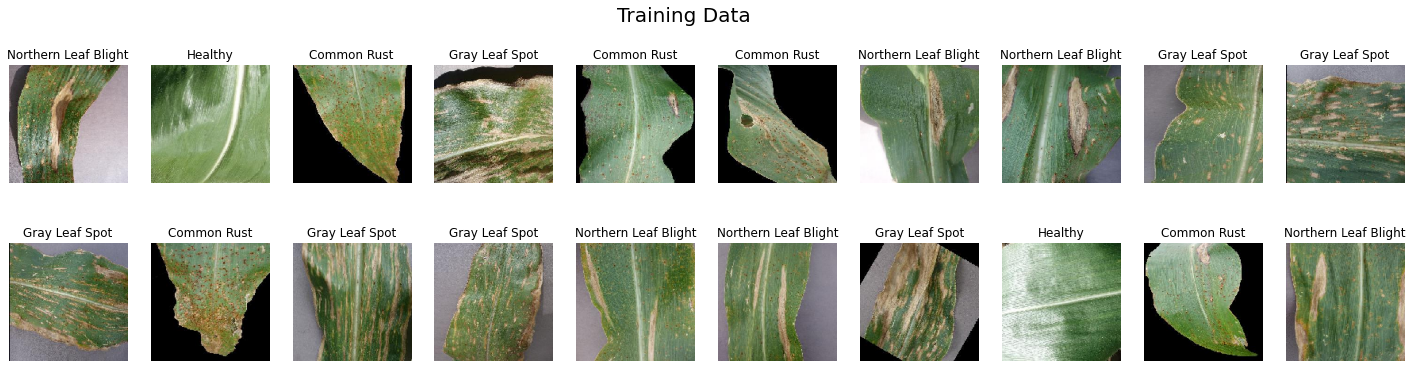

In [6]:
plt.figure(figsize=(25, 6))
plt.suptitle('Training Data', fontsize=20)
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(train_data[i][0][0])
    plt.title(class_name[np.argmax(train_data[i][1][0])])
    plt.axis('off')
plt.show()

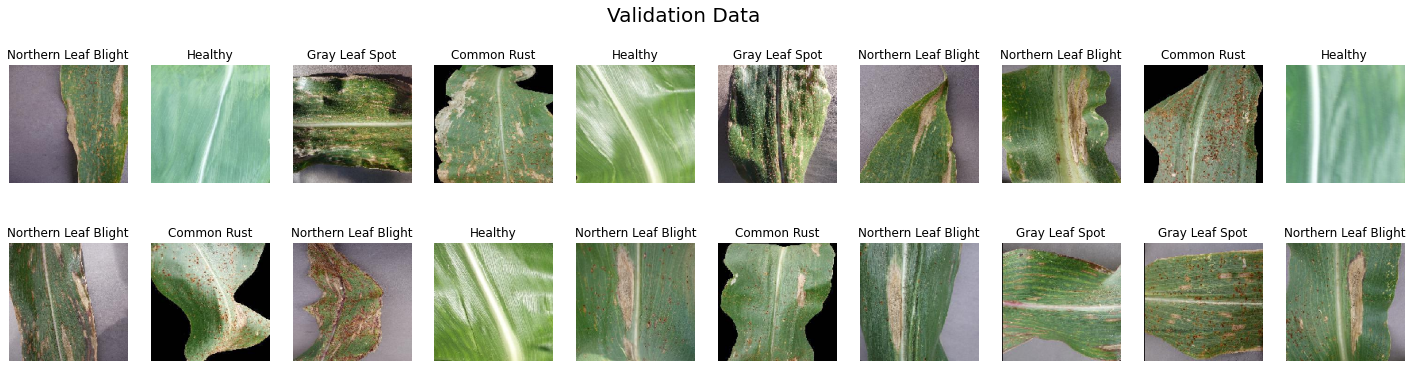

In [7]:
plt.figure(figsize=(25, 6))
plt.suptitle('Validation Data', fontsize=20)
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(valid_data[i][0][0])
    plt.title(class_name[np.argmax(valid_data[i][1][0])])
    plt.axis('off')
plt.show()

### Modeling

In [8]:
model = Sequential()
# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

# # Fully Connected Layer 1
# model.add(Dense(64, activation='relu'))

# Fully Connected Layer 2
model.add(Dense(4, activation='softmax'))

In [9]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True), keras.callbacks.ModelCheckpoint('corn_model.h5', monitor='val_loss', save_best_only=True)]

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=valid_data, epochs=10, callbacks=callback)

Epoch 1/10
293/293 [==============================] - 14s 38ms/step - loss: 0.7732 - accuracy: 0.8876 - val_loss: 5.7993 - val_accuracy: 0.2731
Epoch 2/10
293/293 [==============================] - 10s 34ms/step - loss: 0.6056 - accuracy: 0.9255 - val_loss: 1.0110 - val_accuracy: 0.9083
Epoch 3/10
293/293 [==============================] - 10s 34ms/step - loss: 0.3478 - accuracy: 0.9412 - val_loss: 0.4717 - val_accuracy: 0.9172
Epoch 4/10
293/293 [==============================] - 10s 34ms/step - loss: 0.2065 - accuracy: 0.9558 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 5/10
293/293 [==============================] - 10s 34ms/step - loss: 0.5484 - accuracy: 0.9412 - val_loss: 1.3226 - val_accuracy: 0.8590
Epoch 6/10
293/293 [==============================] - 10s 34ms/step - loss: 0.2466 - accuracy: 0.9605 - val_loss: 0.7855 - val_accuracy: 0.9165


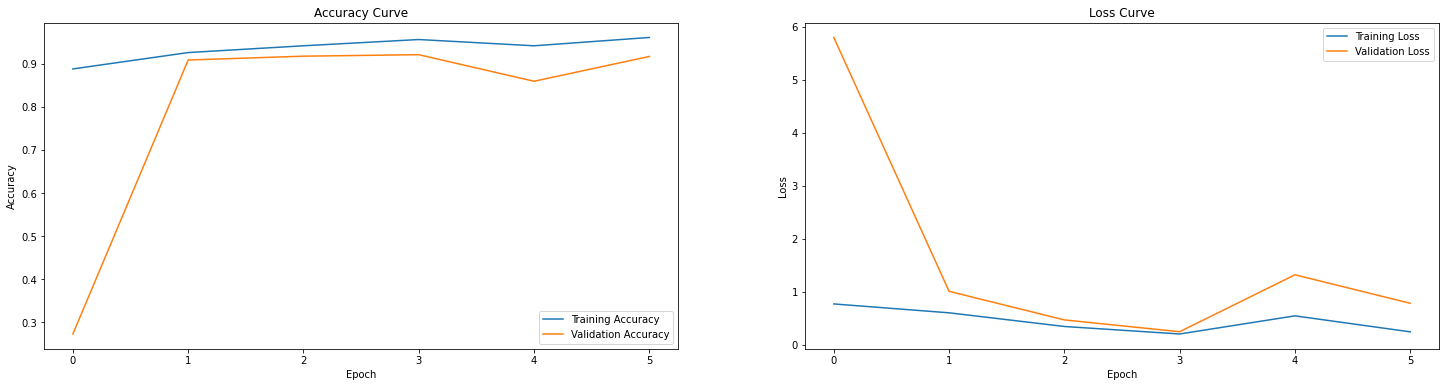

In [11]:
metrics = pd.DataFrame(history.history)

plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics.accuracy, label='Training Accuracy')
plt.plot(metrics.val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(metrics.loss, label='Training Loss')
plt.plot(metrics.val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing

In [18]:
def load_prep(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255
    pred = model.predict(np.expand_dims(img, axis=0))
    return img, pred

In [19]:
imgs = [load_prep('RS_Rust 1585.JPG'), 
        load_prep('0e0ed08d-3021-49a7-9098-7c90afeb2fd5___RS_GLSp 4346.JPG'),
        load_prep('0f735e65-a30d-47b3-bf2f-d857a8e5a7d7___R.S_HL 8042 copy 2_flipLR.jpg'),
        load_prep('1f36d729-d193-4824-a159-a6085f2b7159___RS_NLB 3741.JPG'),
        load_prep('grey.JPG'),
        load_prep('grey2.JPG')]

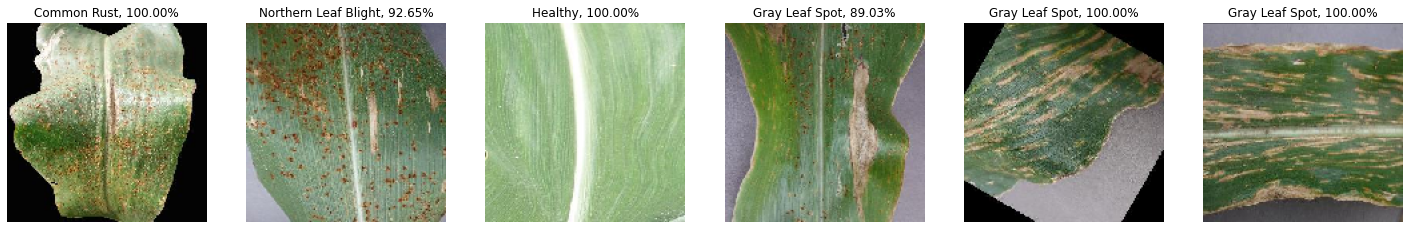

In [21]:
plt.figure(figsize=(25, 6))
for i in range(len(imgs)):
    plt.subplot(1, 6, i+1)
    plt.imshow(imgs[i][0])
    plt.title(f"{class_name[np.argmax(imgs[i][1][0])]}, {imgs[i][1][0][np.argmax(imgs[i][1][0])]*100:.2f}%")
    plt.axis('off')
plt.show()

In [23]:
from sklearn.metrics import classification_report

In [77]:
val_data = valid_data.next()
res = model.predict(val_data[0])
print(classification_report(np.argmax(val_data[1], axis=1), np.argmax(res, axis=1), target_names=class_name))

                      precision    recall  f1-score   support

      Gray Leaf Spot       0.60      1.00      0.75         3
         Common Rust       1.00      0.86      0.92         7
Northern Leaf Blight       0.80      0.67      0.73         6
             Healthy       1.00      1.00      1.00         4

            accuracy                           0.85        20
           macro avg       0.85      0.88      0.85        20
        weighted avg       0.88      0.85      0.85        20



## Transfer Learning

In [32]:
pretrained_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='avg')
pretrained_model.trainable = False

In [34]:
model2 = Sequential()
model2.add(pretrained_model)
model2.add(Flatten())
model2.add(Dense(4, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(train_data, validation_data=valid_data, epochs=10, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

Epoch 1/10
293/293 [==============================] - 22s 68ms/step - loss: 0.2884 - accuracy: 0.8999 - val_loss: 0.1839 - val_accuracy: 0.9336
Epoch 2/10
293/293 [==============================] - 19s 66ms/step - loss: 0.1397 - accuracy: 0.9537 - val_loss: 0.1571 - val_accuracy: 0.9480
Epoch 3/10
293/293 [==============================] - 19s 65ms/step - loss: 0.1043 - accuracy: 0.9667 - val_loss: 0.1422 - val_accuracy: 0.9514
Epoch 4/10
293/293 [==============================] - 19s 65ms/step - loss: 0.0854 - accuracy: 0.9708 - val_loss: 0.1329 - val_accuracy: 0.9548
Epoch 5/10
293/293 [==============================] - 18s 62ms/step - loss: 0.0771 - accuracy: 0.9746 - val_loss: 0.1349 - val_accuracy: 0.9555
Epoch 6/10
293/293 [==============================] - 18s 63ms/step - loss: 0.0665 - accuracy: 0.9788 - val_loss: 0.1389 - val_accuracy: 0.9562


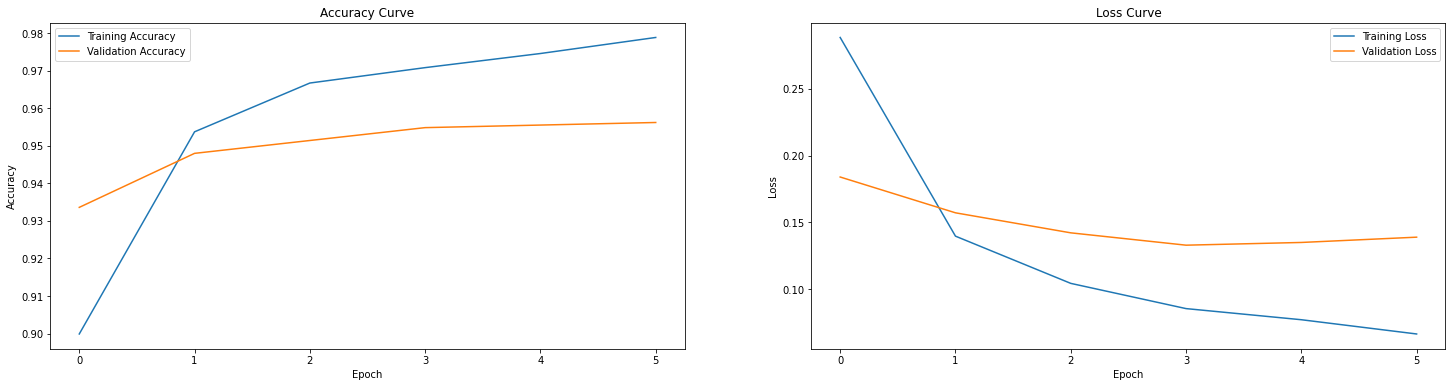

In [35]:
metrics2 = pd.DataFrame(history2.history)

plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics2.accuracy, label='Training Accuracy')
plt.plot(metrics2.val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(metrics2.loss, label='Training Loss')
plt.plot(metrics2.val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [84]:
val_data = valid_data.next()
res = model2.predict(val_data[0])
print(classification_report(np.argmax(val_data[1], axis=1), np.argmax(res, axis=1), target_names=class_name))

                      precision    recall  f1-score   support

      Gray Leaf Spot       1.00      0.75      0.86         4
         Common Rust       1.00      1.00      1.00         4
Northern Leaf Blight       0.80      1.00      0.89         4
             Healthy       1.00      1.00      1.00         8

            accuracy                           0.95        20
           macro avg       0.95      0.94      0.94        20
        weighted avg       0.96      0.95      0.95        20



## MobileNetV2

In [78]:
mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(150, 150, 3), pooling='avg')
mobilenet.trainable = False

In [79]:
model3 = Sequential()
model3.add(mobilenet)
model3.add(Flatten())
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(train_data, validation_data=valid_data, epochs=10, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)])

Epoch 1/10
293/293 [==============================] - 13s 36ms/step - loss: 0.2395 - accuracy: 0.9168 - val_loss: 0.1668 - val_accuracy: 0.9418
Epoch 2/10
293/293 [==============================] - 8s 27ms/step - loss: 0.1118 - accuracy: 0.9597 - val_loss: 0.1571 - val_accuracy: 0.9500
Epoch 3/10
293/293 [==============================] - 8s 27ms/step - loss: 0.0897 - accuracy: 0.9689 - val_loss: 0.1174 - val_accuracy: 0.9603
Epoch 4/10
293/293 [==============================] - 8s 27ms/step - loss: 0.0746 - accuracy: 0.9740 - val_loss: 0.1092 - val_accuracy: 0.9624
Epoch 5/10
293/293 [==============================] - 8s 27ms/step - loss: 0.0723 - accuracy: 0.9740 - val_loss: 0.1107 - val_accuracy: 0.9651
Epoch 6/10
293/293 [==============================] - 8s 27ms/step - loss: 0.0576 - accuracy: 0.9787 - val_loss: 0.1075 - val_accuracy: 0.9658
Epoch 7/10
293/293 [==============================] - 8s 27ms/step - loss: 0.0537 - accuracy: 0.9810 - val_loss: 0.1014 - val_accuracy: 0.966

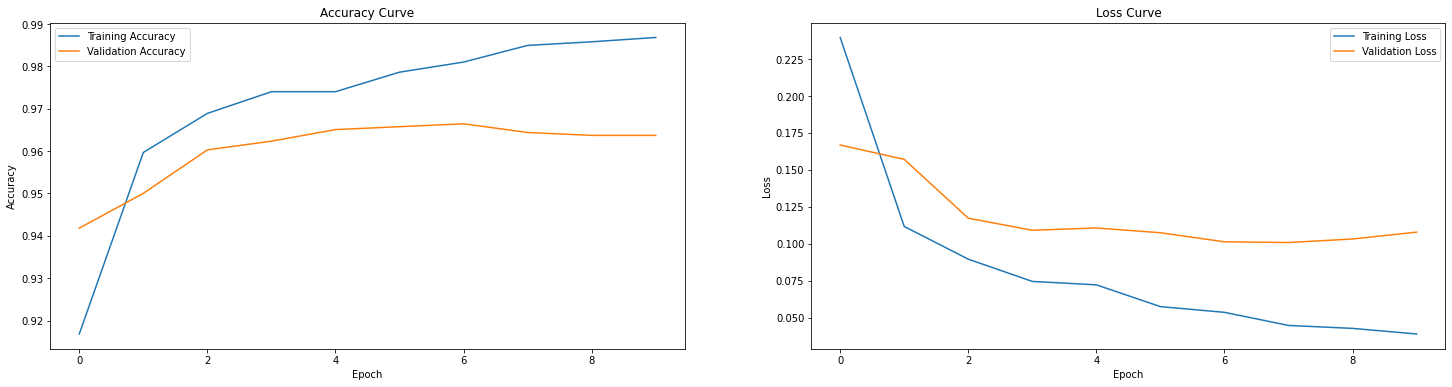

In [80]:
metrics3 = pd.DataFrame(history3.history)

plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.plot(metrics3.accuracy, label='Training Accuracy')
plt.plot(metrics3.val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(metrics3.loss, label='Training Loss')
plt.plot(metrics3.val_loss, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [92]:
val_data = valid_data.next()
res = model3.predict(val_data[0])
print(classification_report(np.argmax(val_data[1], axis=1), np.argmax(res, axis=1), target_names=class_name))

                      precision    recall  f1-score   support

      Gray Leaf Spot       1.00      0.67      0.80         3
         Common Rust       1.00      1.00      1.00         7
Northern Leaf Blight       1.00      1.00      1.00         4
             Healthy       0.86      1.00      0.92         6

            accuracy                           0.95        20
           macro avg       0.96      0.92      0.93        20
        weighted avg       0.96      0.95      0.95        20

